In [93]:
from astropy.table import Table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [94]:
table = Table.read("ch2_xsm_20200928_v1_level2.lc")

In [95]:
print(table)

       TIME           RATE     ERROR   FRACEXP
        s            ct / s   counts/s        
------------------ --------- --------- -------
118022400.44376001 56.586166 7.5223775     1.0
118022401.44376001  75.02865  8.661908     1.0
118022402.44376001  67.52199  8.217176     1.0
118022403.44376001  81.25248  9.014016     1.0
118022404.44376001 79.532425  8.918096     1.0
118022405.44376001  77.37406  8.796252     1.0
118022406.44376001  77.34502  8.794601     1.0
118022407.44376001  70.27271  8.382882     1.0
118022408.44376001  81.94259  9.052215     1.0
118022409.44376001 75.475586  8.687669     1.0
               ...       ...       ...     ...
118108789.44376001  86.36383  9.293214     1.0
118108790.44376001  78.35937  8.852082     1.0
118108791.44376001  82.79164  9.098991     1.0
118108792.44376001  87.59899  9.359433     1.0
118108793.44376001 86.327354  9.291251     1.0
118108794.44376001  85.11869  9.225979     1.0
118108795.44376001  79.41163  8.911321     1.0
118108796.443

In [96]:
time = table["TIME"]
rate = table["RATE"]
print(time)
print(rate)

       TIME       
        s         
------------------
118022400.44376001
118022401.44376001
118022402.44376001
118022403.44376001
118022404.44376001
118022405.44376001
118022406.44376001
118022407.44376001
118022408.44376001
118022409.44376001
               ...
118108789.44376001
118108790.44376001
118108791.44376001
118108792.44376001
118108793.44376001
118108794.44376001
118108795.44376001
118108796.44376001
118108797.44376001
118108798.44376001
Length = 84181 rows
   RATE  
  ct / s 
---------
56.586166
 75.02865
 67.52199
 81.25248
79.532425
 77.37406
 77.34502
 70.27271
 81.94259
75.475586
      ...
 86.36383
 78.35937
 82.79164
 87.59899
86.327354
 85.11869
 79.41163
 81.39757
87.616745
 82.65829
Length = 84181 rows


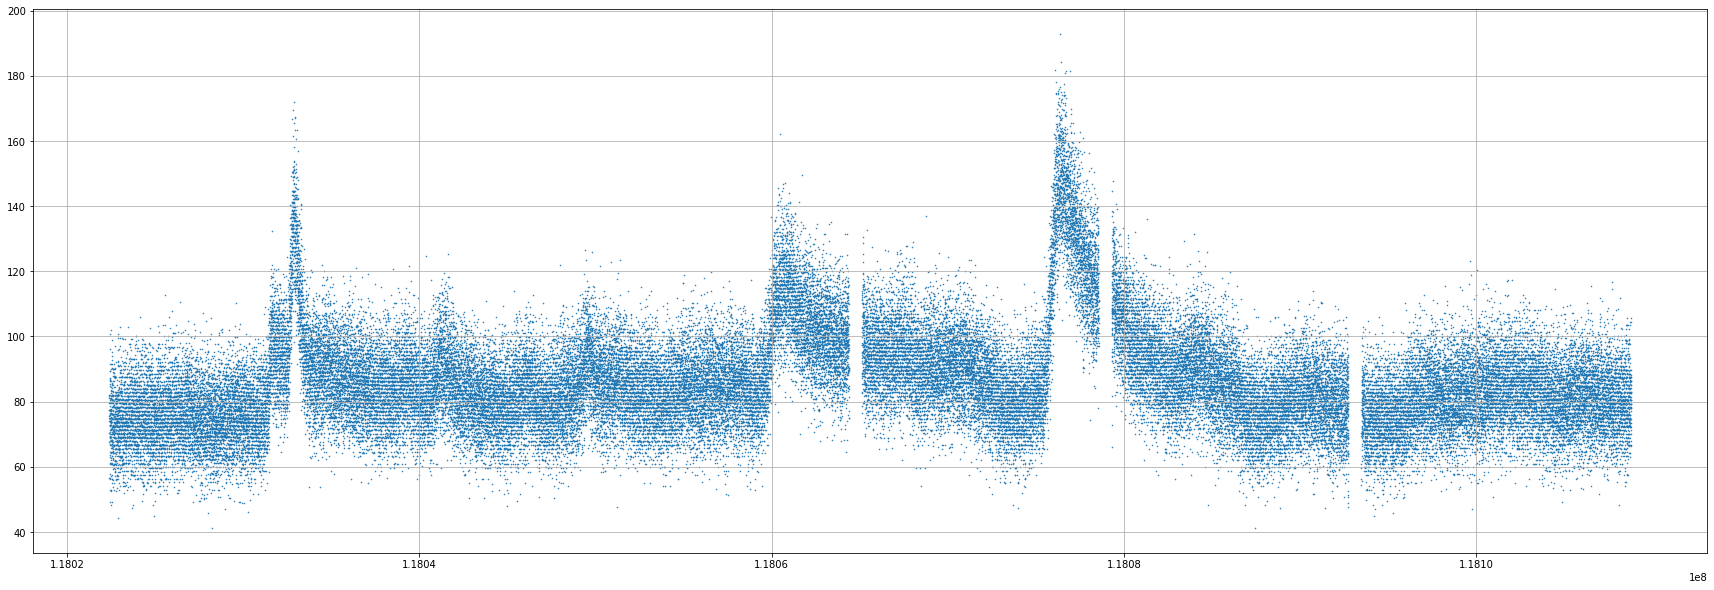

In [97]:
plt.figure(figsize = (30,10))
plt.scatter(time,rate,s=0.3)
plt.grid()
plt.show()


In [98]:
print(time)

       TIME       
        s         
------------------
118022400.44376001
118022401.44376001
118022402.44376001
118022403.44376001
118022404.44376001
118022405.44376001
118022406.44376001
118022407.44376001
118022408.44376001
118022409.44376001
               ...
118108789.44376001
118108790.44376001
118108791.44376001
118108792.44376001
118108793.44376001
118108794.44376001
118108795.44376001
118108796.44376001
118108797.44376001
118108798.44376001
Length = 84181 rows


In [99]:
time = [int(i -time[0]) for i in time]

In [100]:

for i in range(len(time) -1 ):
    if(time[i+1] - time[i] >1):
        print(time[i+1] -time[i])

2
2
2
2
2
2
2
2
2
2
2
2
2
744
732
732


In [101]:
t1 = []
r1 =[]
for i in range(len(time)-1):
    t1.append(time[i])
    r1.append(rate[i])
    if(time[i+1] - time[i] == 2):
        t1.append(time[i]+1)
        r1.append((rate[i]+rate[i+1])/2)



In [102]:
for i in range(len(t1) -1 ):
    if(t1[i+1] - t1[i] >1):
        print(t1[i+1] -t1[i])

744
732
732


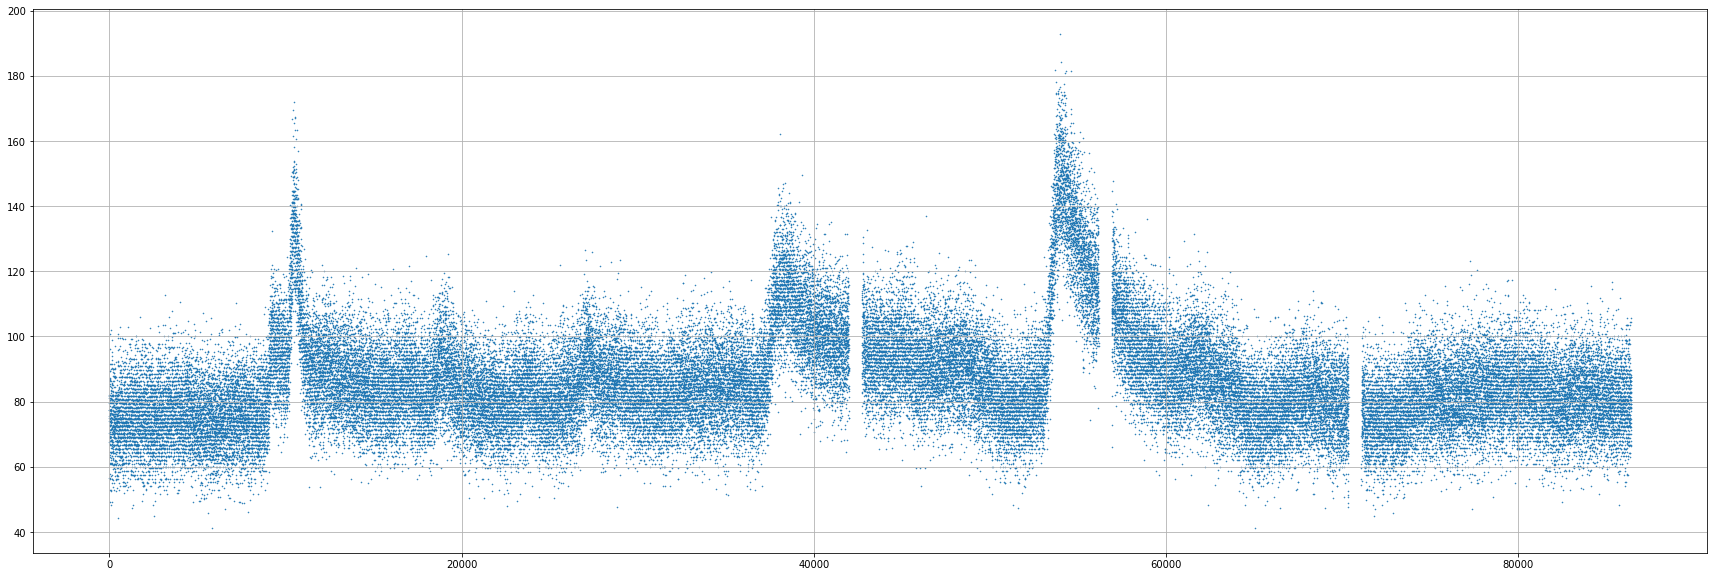

In [103]:
plt.figure(figsize = (30,10))
plt.scatter(t1,r1,0.3)
plt.grid()
plt.show()

In [104]:
s =[]
e =[]
s.append(0)
for i in range(1,len(t1)):
    if(t1[i] - t1[i-1] >1):
        e.append(i)
        s.append(i)
e.append(len(t1))
print(len(s),len(e))
e


4 4


[41987, 55428, 68880, 84193]

In [105]:
print(s)

[0, 41987, 55428, 68880]


In [106]:
t_dash =[]
r_dash =[]
for i in range(len(s)):
    x=[]
    y=[]
    for j in range(s[i],e[i]):
        x.append(t1[j])
        y.append(r1[j])
    t_dash.append(x)
    r_dash.append(y)

print(len(t_dash),len(r_dash))



4 4


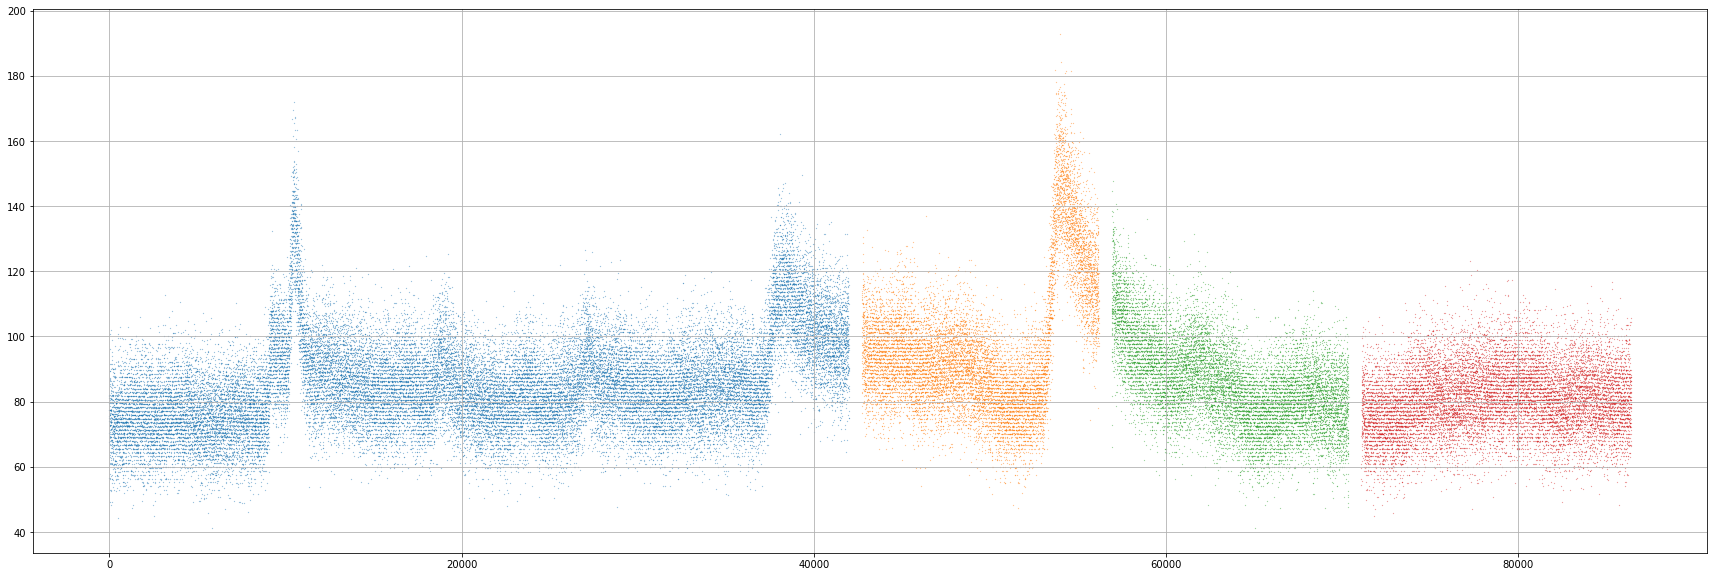

In [107]:
plt.figure(figsize=(30,10))
for i in range(len(t_dash)):
    plt.scatter(t_dash[i],r_dash[i],s = 0.03)
plt.grid()
plt.show()


In [108]:
t3 = []
r3 = []
for i in range(len(t_dash)):
    x = t_dash[i]
    y = r_dash[i]
    if(len(x)>240):
        w_size = int(250/( 1+ np.exp(-1*(len(x) - 250))))
        shift = w_size//2
        norm_dp=[]
        norm=[]
        norm_dp.append(np.mean(y[0:w_size]))
        norm.append(x[0])
        for j in range(w_size,len(y),shift):
            norm_dp.append(np.mean(y[j:j+shift]))
            norm.append(x[j])
        norm_dp = np.array(norm_dp)
        norm = np.array(norm)
        x_new = np.linspace(x[0],x[0]+len(x),x[0]+len(x))
        func = interp1d(norm,norm_dp,fill_value='extrapolate',kind = 'linear')
        y_new = func(x_new)
        t3.append(x_new)
        r3.append(y_new)

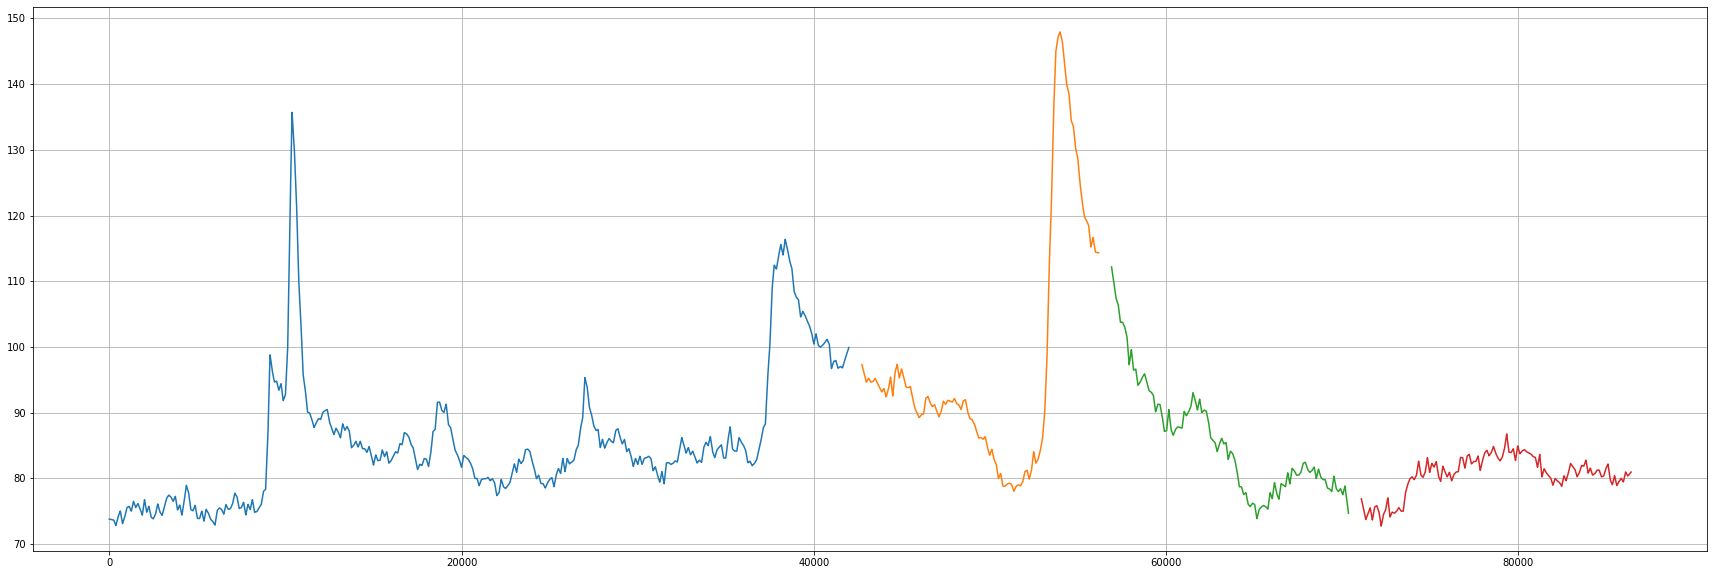

In [109]:
plt.figure(figsize=(30,10))
for i in range(len(r3)):
    plt.plot(t3[i],r3[i])
plt.grid()
plt.show()

In [110]:
x_interp = []
y_interp = []
for i in range(len(t3)):
    for j in range(len(t3[i])):
        x_interp.append(t3[i][j])
        y_interp.append(r3[i][j])

In [111]:
final_time = np.linspace(int(x_interp[0]), int(x_interp[-1] - x_interp[0]),int(x_interp[-1] - x_interp[0]))
f = interp1d(x_interp,y_interp,fill_value='extrapolate',kind ='linear')
final_rate = f(final_time)

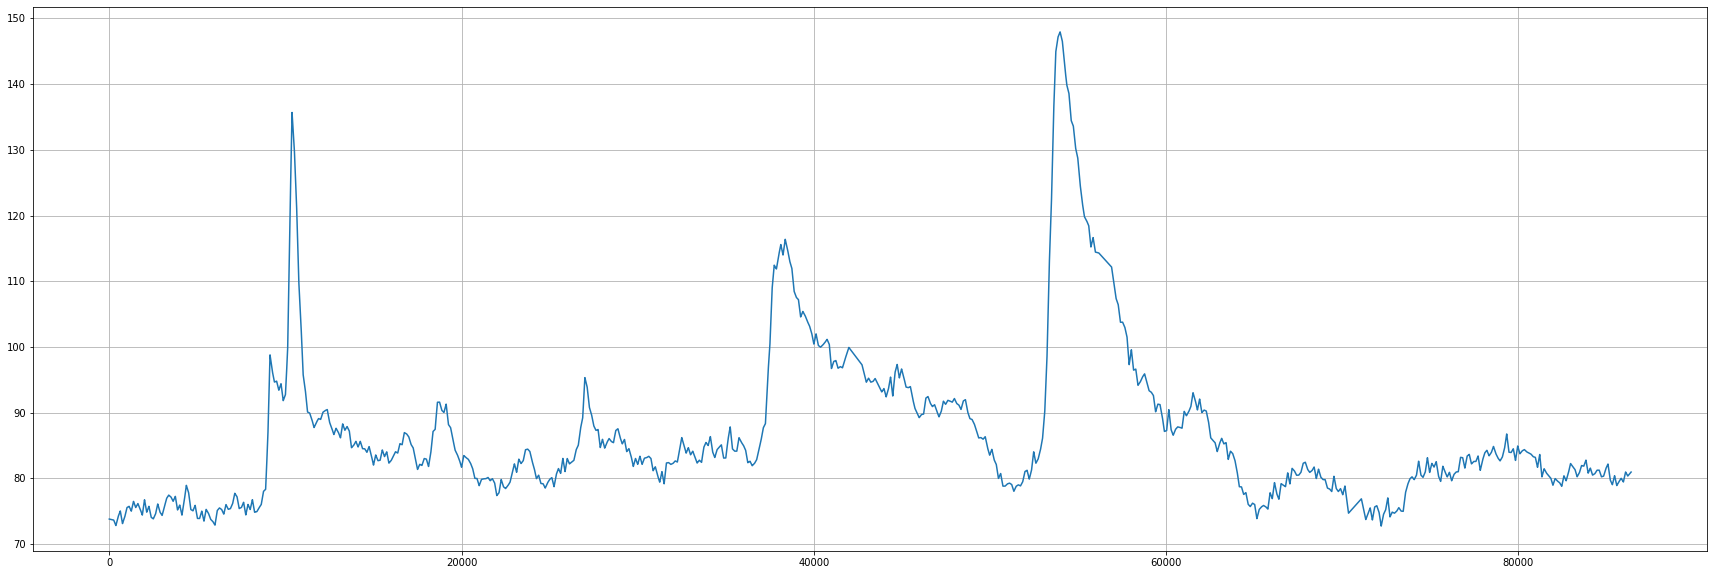

In [112]:
plt.figure(figsize= (30,10))
plt.plot(final_time,final_rate)
plt.grid()
plt.show()